**NASA-Sloan Atlas **

Using NSA catalog to look for filaments around Virgo.

** WISE **

Using WISE catalog to select the star-forming galaxies.  Some of the WISE columns are described here:

    http://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec3_1a.html
    
    
It looks like the mpro values are upper limits if SNR < 2.

** Coordinates of M87 and M101 **

Good to plot these positions along with other galaxies.

** Things to do:  **

* match alpha 70 to AGC
* get SDSS diameters for NSA galaxies so that we can calculate HI Def
* calculate HI Def for all AGC.70 galaxies
* calculate environment for all AGC.70 galaxies


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)

In [4]:
# read in WISE catalog
wisefile='/Users/rfinn/research/NSA/nsa_v0_1_2_wise.fits'
wise=fits.getdata(wisefile)

In [5]:
# read in John's stellar masses
massfile='/Users/rfinn/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits'
jmass=fits.getdata(massfile)

In [6]:
# select galaxies near Virgo
raflag = (nsa.RA > 150.) & (nsa.RA < 220.) 
decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
velflag = (nsa.ZDIST*3.e5 > 1000.) & (nsa.ZDIST*3.e5 < 3000.)
vflag = raflag & decflag & velflag
vra=187.69708
vdec=12.33694
rad_distance = np.sqrt((nsa.RA - vra)**2+(nsa.DEC-vdec)**2)

## Write Out Files That Contain Virgo Region Only

The following fits tables will only have the NSA galaxies that are in the vicinity of Virgo.

In [7]:
nsaagcfile='/Users/rfinn/research/NSA/nsa_v0_1_2_with_AGC_fitsbasic.fits'
nsa_agc=fits.getdata(nsaagcfile)

#this contains columns from both the NSA and the AGC catalogs
fits.writeto('/Users/rfinn/Dropbox/Research/ISSI/nsa_v0_1_2_with_AGC.Virgo.fits',nsa_agc[vflag],clobber=True)

# just contains wise columns, line-matched to above table
fits.writeto('/Users/rfinn/Dropbox/Research/ISSI/nsa_v0_1_2_wise.Virgo.fits',wise[vflag],clobber=True)


## DEC vs RA, Color-coded by Recession Velocity

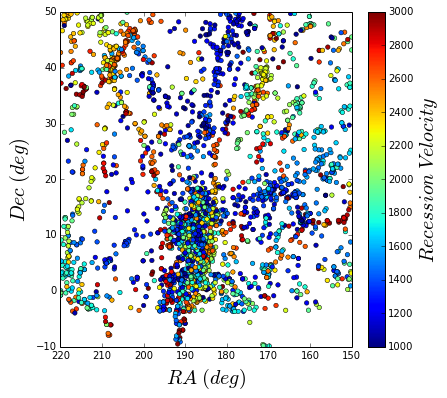

In [8]:
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Virgo_positions.png')

## WISE 22um Sources

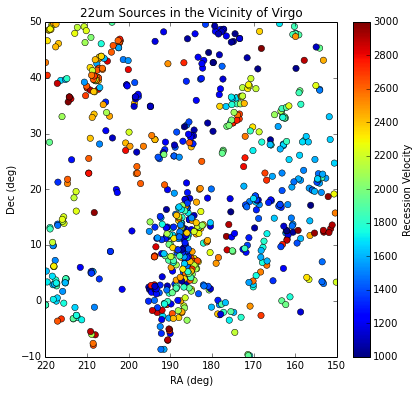

In [94]:
# make same plot, but just show 22um detections
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 4.) 
plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.ZDIST[wflag]*3.e5,s=40,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('22um Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_22um_sources.png')

## Redshift Distribution

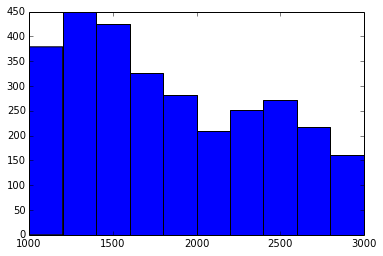

In [95]:
plt.figure()
t=plt.hist(nsa.ZDIST[vflag]*3.e5)

## WISE 12um Sources

number of galaxies with 12um detections =  1439


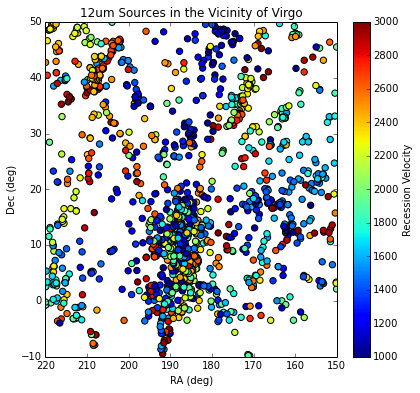

In [96]:
# make same plot, but just show 12um detections
wflag = vflag & (wise.W3MPRO > 0.) & (wise.W3SNR > 2.) 
print 'number of galaxies with 12um detections = ',sum(wflag)
plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.ZDIST[wflag]*3.e5,s=40,vmin=1000,vmax=3000)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('12um Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_12um_sources.png')

## ALFALFA Sources

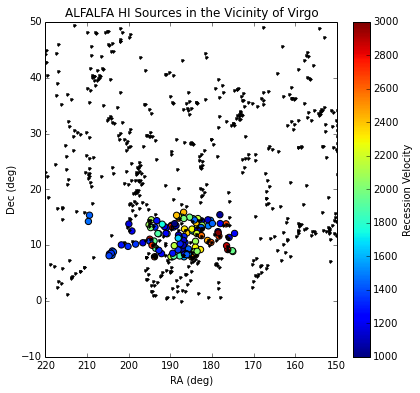

In [97]:
# make same plot, but just show HI detections
wflag = vflag & (nsa.IALFALFA > -1) 
plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.ZDIST[wflag]*3.e5,s=40,vmin=1000,vmax=3000)
# add positions from a.70 catalog
agc=fits.getdata('/Users/rfinn/research/AGC/agctotal.fits')
aflag = (((agc.VOPT > 2400.) & (agc.VOPT < 3000.)) | ((agc.V21 > 2400.) & (agc.V21 < 3000.)) ) & (agc.FLUX100 > 0.1)
plt.plot(agc.RA[aflag],agc.DEC[aflag],'k.')
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')


plt.title('ALFALFA HI Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_HI_sources.png')

ALFALFA 40% data release does not include much of large-scale structure around Virgo.  The survey should go from 0 < DEC < 36, so we should have many more detections.  I will check to see if this region is contained in the 70% data release.

## Match CO Sources to ALFALFA a.70

In [98]:
def findnearest(x1,y1,x2,y2,delta):#use where command
    matchflag=1
    nmatch=0
    d=np.sqrt((x1-x2)**2 + (y1-y2)**2)#x2 and y2 are arrays
    index=np.arange(len(d))
    t=index[d<delta]
    matches=t
    if len(matches) > 0:
        nmatch=len(matches)
        if nmatch > 1:
            imatch=index[(d == min(d[t]))]
        else:
            imatch=matches[0]			
    else:
        imatch = 0
        matchflag = 0

    return imatch, matchflag,nmatch


In [99]:
sum(finalflag)
for i in range(len(nsa.RA)):
    if finalflag[i]:
        t=findnearest(nsa.RA[i],nsa.DEC[i],agc.RA,agc.DEC,10./3600.)
        if t[1] == 1:
            agcindex=t[0]
            if agc.FLUX100[agcindex] > 0: #calculate HI mass
                massHI = 2.36e5*agc.FLUX100[agcindex]/100.*(nsa.ZDIST[i]*3.e5/70.)**2
            else:
                massHI=1
            print '%s: HI flux = %5.2f, log10(HI mass) = %5.2f'%(nsa.IAUNAME[i],agc.FLUX100[agcindex]/100.,np.log10(massHI))
        else:
            print nsa.IAUNAME[i], 'no match in AGC'

## CFHT Sample

We select all NSA galaxies with:

* $ 2400 < v_r < 2800$
* WISE 22um $SNR > 4$
* $9 < \log_{10}(M/M_\odot) < 10$
* $182^\circ < RA < 202^\circ$
* $ 1^\circ < DEC < 33^\circ$

number of galaxies in sample =  27


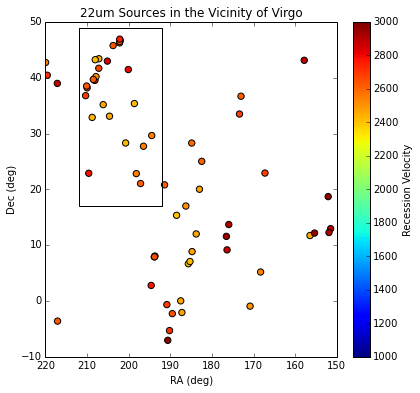

In [100]:
# make same plot, but just show 22um detections
wiseflag = (wise.W4MPRO > 0.1) & (wise.W4SNR > 4.) 
mflag = (jmass.MSTAR_50 > 9.) & (jmass.MSTAR_50 < 10.)
wflag = vflag & wiseflag & mflag &(nsa.ZDIST*3.e5 > 2400.) & (nsa.ZDIST*3.e5 < 3000.) 
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.ZDIST[wflag]*3.e5,s=40,vmin=1000,vmax=3000)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k')
fig.gca().add_artist(rect)
inbox= (abs(nsa.RA - (ra_min + dra/2.)) < dra/2.) & (abs(nsa.DEC - (dec_min+ddec/2.)) < ddec/2.)
sample = wflag & inbox
print 'number of galaxies in sample = ',sum(sample)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('22um Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_22um_sources.png')




['J134845.16+414235.3' 'J134835.47+432428.8' 'J135209.79+431434.6'
 'J135301.89+393450.8' 'J135224.87+393327.4' 'J135125.37+401247.7'
 'J132849.76+461544.6' 'J132810.05+464019.7' 'J132833.65+462959.7'
 'J132833.19+465537.8' 'J140124.02+364800.3' 'J135957.09+381203.3'
 'J132256.47+281859.1' 'J130834.27+210259.9' 'J131241.78+224947.2'
 'J134031.19+425938.0' 'J134428.40+351131.9' 'J133458.10+454645.0'
 'J133825.19+330702.9' 'J140025.00+383113.0']


/Users/rfinn/Ureka/python/lib/python2.7/site-packages/matplotlib-1.3.1-py2.7-macosx-10.6-x86_64.egg/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


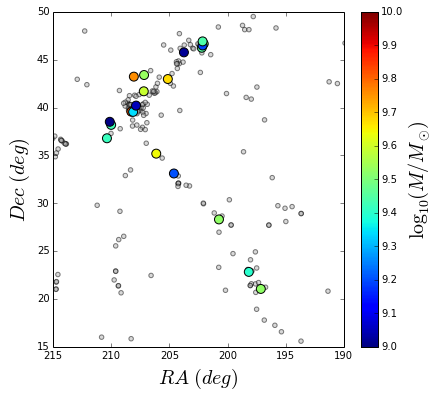

In [103]:
# zoom in on sources to target
fig=plt.figure(figsize=(6,6))
plotflag = (nsa.ZDIST*3.e5 > 2400.) & (nsa.ZDIST*3.e5 < 3000.)
plt.scatter(nsa.RA[plotflag],nsa.DEC[plotflag],c='0.7',alpha=.5)
# visual inspection of sdss image and spectra
# shows that J135359.49+394256.0 is a red passive galaxies
# so I'm removing this from sample
COnames=['J134845.16+414235.3','J134835.47+432428.8','J135209.79+431434.6',
         'J135301.89+393450.8','J135224.87+393327.4','J135125.37+401247.7',
         'J132849.76+461544.6','J132810.05+464019.7','J132833.65+462959.7',
         'J132833.19+465537.8','J140124.02+364800.3','J135957.09+381203.3',
         'J132256.47+281859.1','J130834.27+210259.9','J131241.78+224947.2',
         'J134031.19+425938.0','J134428.40+351131.9','J135359.49+394256.0',
         'J133825.19+330702.9','J140025.00+383113.0']
allgalnames=np.array(['J134845.16+414235.3', 'J134835.47+432428.8', 'J135209.79+431434.6',
       'J135301.89+393450.8', 'J135224.87+393327.4', 'J135125.37+401247.7',
       'J132021.28+412833.9', 'J132849.76+461544.6', 'J132810.05+464019.7',
       'J132833.65+462959.7', 'J132833.19+465537.8', 'J140124.02+364800.3',
       'J135957.09+381203.3', 'J132256.47+281859.1', 'J131432.94+352305.3',
       'J135505.04+325411.2', 'J130547.56+274402.9', 'J130834.27+210259.9',
       'J131241.78+224947.2', 'J134031.19+425938.0', 'J134428.40+351131.9',
       'J135359.49+394256.0', 'J125749.69+293917.0', 'J133458.10+454645.0',
       'J133825.19+330702.9', 'J135822.69+225313.9', 'J140025.00+383113.0'])
mask = np.array([1,1,1,
                 1,1,1,
                 0,1,1,
                 1,1,1,
                 1,1,0,
                 0,0,1,
                 1,1,1,
                 0,0,1,
                 1,0,1],'bool')
galnames=allgalnames[mask]
print galnames
nameflag = np.zeros(len(nsa.RA),'bool')
for g in galnames:
    nameflag[nsa.IAUNAME == g] = True
finalflag=wflag & (nameflag)

plt.scatter(nsa.RA[finalflag],nsa.DEC[finalflag],c=jmass.MSTAR_50[finalflag],s=80,vmin=9,vmax=10)

cb=plt.colorbar(fraction=.08)
cb.set_label('$\log_{10}(M/M_\odot)$',size=20)
# plot Mosaic field of view for each galaxy
# how many pointing are required?

## for Halpha proposal
## plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=jmass.MSTAR_50[wflag],s=30,vmin=9,vmax=10)
##ra = nsa.RA[finalflag]
##dec = nsa.DEC[finalflag]
##
##for i in range(len(ra)):
##    rect= plt.Rectangle((ra[i]-.5,dec[i]-.5), 1, 1,fill=False, color='k')
##    fig.gca().add_artist(rect)

plt.axis([190,215,15,50])
#plt.axis([200,203,45,49])
#plt.axis([205,210,36,43])
#plt.axis([200,212,30,50])
plt.gca().invert_xaxis()
#plt.axhline(y=37)
#plt.axhline(y=41)
#plt.axhline(y=46)

# this was for Halpha proposal

#plotrectangle = (dec < 35.) #| ((dec > 41) & (dec < 46))
#propra=[]
#propdec=[]
#for i in range(len(ra)):
#    if plotrectangle[i]:
#        #print 'plotting a rectangle!'
#        rect= plt.Rectangle((ra[i]-.5,dec[i]-.5), 1, 1,fill=False, color='k')
#        fig.gca().add_artist(rect)
#        #print ra[i],dec[i]
#        propra.append(ra[i])
#        propdec.append(dec[i])
#pointing_ra=np.array([202.2,208.2,210.0,208.,210.2,206.9,207.2,204.2,203.8,208.,205.,207.2,203.8])
#pointing_dec=np.array([46.6, 39.9, 38.3,37.8,  37., 43.7, 40.2, 44.6,  46.,43.4,42.7, 41.7, 32.])
#for i in range(len(pointing_ra)):
#    rect= plt.Rectangle((pointing_ra[i]-.5,pointing_dec[i]-.5), 1, 1,fill=False, color='k')
#    fig.gca().add_artist(rect)
#    propra.append(pointing_ra[i])
#    propdec.append(pointing_dec[i])
    
plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec  \ (deg)$',fontsize=20)

#plt.title('22um Sources in the NE Filament')
plt.savefig('Virgo_filament_C0_obs.pdf')

In [49]:
propra=np.array(propra)
propdec=np.array(propdec)
#for i in range(len(propra)): print propra[i],propdec[i]
#print coords
c=SkyCoord(ra=propra*u.degree,dec=propdec*u.degree)
#for i in range(len(propra)): print c[i].ra.deg,c[i].dec.deg

## Coordinates of MegaCam Pointings

In [37]:
# copied this into target list on proposal web form
for i in range(len(propra)):
    print 'Pointing',i+1, c[i].ra.to_string(unit='hour',sep=':',precision=2), c[i].dec.to_string(unit='deg',sep=':',precision=1)

Pointing 1 13:22:56.44 28:18:59.1
Pointing 2 13:08:34.31 21:02:59.0
Pointing 3 13:12:41.80 22:49:47.4
Pointing 4 13:38:24.49 33:07:04.3
Pointing 5 13:28:48.00 46:36:00.0
Pointing 6 13:52:48.00 39:54:00.0
Pointing 7 14:00:00.00 38:18:00.0
Pointing 8 13:52:00.00 37:48:00.0
Pointing 9 14:00:48.00 37:00:00.0
Pointing 10 13:47:36.00 43:42:00.0
Pointing 11 13:48:48.00 40:12:00.0
Pointing 12 13:36:48.00 44:36:00.0
Pointing 13 13:35:12.00 46:00:00.0
Pointing 14 13:52:00.00 43:24:00.0
Pointing 15 13:40:00.00 42:42:00.0
Pointing 16 13:48:48.00 41:42:00.0
Pointing 17 13:35:12.00 32:00:00.0


## SDSS Image Cutouts

The following will create a list to feed into

http://skyserver.sdss.org/dr12/en/tools/chart/listinfo.aspx

In [ ]:
k=1
for i in range(len(nsa.RA)):
    
    if finalflag[i]:
        print '%s %i %12.6f %12.6f'%(nsa.IAUNAME[i],nsa.NSAID[i],nsa.RA[i],nsa.DEC[i])
        k += 1

In [ ]:
print jmass.MSTAR_50[nsa.IAUNAME == 'J133458.10+454645.0']
print jmass.MSTAR[nsa.IAUNAME == 'J133458.10+454645.0']

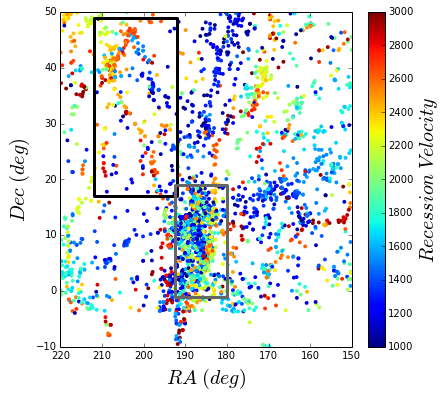

In [64]:
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=15,vmin=1000,vmax=3000,lw=0.)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)

# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
#cb=plt.colorbar(fraction=.08)

#for i in range(len(propra)):
#    rect= plt.Rectangle((c[i].ra.deg-.5,c[i].dec.deg-.5), 1, 1,fill=False, color='k')
#    fig.gca().add_artist(rect)

cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Virgo_positions.png')

## Estimated SFRs of Target Galaxies 

In [42]:
wise.columns

ColDefs(
    name = 'CNTR_01'; format = 'J'
    name = 'DIST_X'; format = 'D'
    name = 'PANG_X'; format = 'D'
    name = 'RA_01'; format = 'D'
    name = 'DEC_01'; format = 'D'
    name = 'DESIGNATION'; format = '21A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'SIGRA'; format = 'D'
    name = 'SIGDEC'; format = 'D'
    name = 'SIGRADEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'ELON'; format = 'D'
    name = 'ELAT'; format = 'D'
    name = 'WX'; format = 'D'
    name = 'WY'; format = 'D'
    name = 'CNTR'; format = 'J'
    name = 'SOURCE_ID'; format = '29A'
    name = 'COADD_ID'; format = '21A'
    name = 'SRC'; format = 'J'
    name = 'W1MPRO'; format = 'D'
    name = 'W1SIGMPRO'; format = 'D'
    name = 'W1SNR'; format = 'D'
    name = 'W1RCHI2'; format = 'D'
    name = 'W2MPRO'; format = 'D'
    name = 'W2SIGMPRO'; format = 'D'
    name = 'W2SNR'; format = 'D'
    name = 'W2RCHI2'; format = 'D'
    name =

(array([   1.,    0.,    4.,   10.,   27.,   33.,   72.,   96.,  118.,   56.]),
 array([ 1.503 ,  2.3129,  3.1228,  3.9327,  4.7426,  5.5525,  6.3624,
         7.1723,  7.9822,  8.7921,  9.602 ]),
 <a list of 10 Patch objects>)

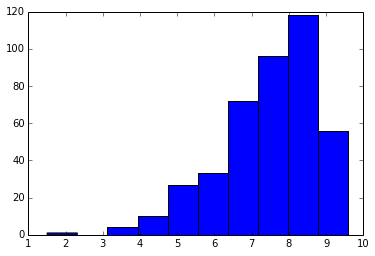

## Converting Flux limit to AB mag